In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [188]:
#loading the dataset and assigning a variable name to it
employee = pd.read_csv('employee.csv')

In [189]:
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


# EDA

In [190]:
employee.head(2)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18


In [191]:
#general information of the dataset
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [192]:
#statistical description of the dataset
employee.describe()

,UNIQUE_ID,BASE_SALARY
count,2000.000000,1886.000000
mean,999.500000,55767.931601
std,577.494589,21693.706679
min,0.000000,24960.000000
25%,499.750000,40170.000000
50%,999.500000,54461.000000
75%,1499.250000,66614.000000
max,1999.000000,275000.000000


In [193]:
#correlation coefficient between the columns
employee.corr()

C:\Users\ALAKA OLUWAGBEMISOLA\AppData\Local\Temp\ipykernel_9020\3663587217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  employee.corr()


,UNIQUE_ID,BASE_SALARY
UNIQUE_ID,1.000000,-0.000114
BASE_SALARY,-0.000114,1.000000


In [194]:
#this gets the sum of all the missing values on each column
employee.isna().sum()

UNIQUE_ID              0
POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64

In [195]:
#copy of the dataset
employee_df = employee.copy()

__filling missing values on columns with missing values__

In [196]:
fill_salary = round(employee['BASE_SALARY'].mean(), 1)

In [197]:
employee['RACE'].fillna(method = 'bfill', inplace = True)

In [198]:
employee['JOB_DATE'].fillna(method = 'ffill', inplace = True)

In [199]:
employee['BASE_SALARY'].fillna(fill_salary, inplace = True)

In [200]:
#checking if there are no more missing values
employee.isna().sum()

UNIQUE_ID            0
POSITION_TITLE       0
DEPARTMENT           0
BASE_SALARY          0
RACE                 0
EMPLOYMENT_TYPE      0
GENDER               0
EMPLOYMENT_STATUS    0
HIRE_DATE            0
JOB_DATE             0
dtype: int64

# QUESTION 1
__a. what is the racial/ethnic compostion of the work force?__

In [201]:
employee.head(1)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13


In [202]:
#counts all the values in each race
employee['RACE'].value_counts()

Black or African American            710
White                                683
Hispanic/Latino                      484
Asian/Pacific Islander               110
American Indian or Alaskan Native     11
Others                                 2
Name: RACE, dtype: int64

In [203]:
employee['RACE'].value_counts(normalize = True)*100

Black or African American            35.50
White                                34.15
Hispanic/Latino                      24.20
Asian/Pacific Islander                5.50
American Indian or Alaskan Native     0.55
Others                                0.10
Name: RACE, dtype: float64

__b. Are there any significant disparities in the representation of different racial/ethnic groups across departments or positions?__

In [204]:
# for DEPARTMENT
#to calculate the racial composition by department
racial_composition_by_dept = employee.groupby(['DEPARTMENT', 'RACE']).size().unstack(fill_value = 0)
racial_composition_by_dept = racial_composition_by_dept.div(racial_composition_by_dept.sum(axis = 1), axis = 0)
racial_composition_by_dept

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
DEPARTMENT,,,,,,
Admn. & Regulatory Affairs,0.000000,0.103448,0.482759,0.206897,0.000000,0.206897
City Controller's Office,0.000000,0.200000,0.600000,0.200000,0.000000,0.000000
City Council,0.000000,0.000000,0.363636,0.181818,0.000000,0.454545
Convention and Entertainment,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Dept of Neighborhoods (DON),0.058824,0.000000,0.588235,0.294118,0.000000,0.058824
Finance,0.000000,0.000000,0.500000,0.400000,0.000000,0.100000
Fleet Management Department,0.000000,0.027778,0.388889,0.250000,0.000000,0.333333
General Services Department,0.000000,0.000000,0.227273,0.454545,0.000000,0.318182
Health & Human Services,0.027273,0.100000,0.490909,0.245455,0.018182,0.118182


In [205]:
#to calculate disparities for the departments
disparities_by_dept = racial_composition_by_dept.div(racial_composition_by_dept.mean())
disparities_by_dept

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
DEPARTMENT,,,,,,
Admn. & Regulatory Affairs,0.000000,1.477157,1.202857,0.725616,0.0,0.878920
City Controller's Office,0.000000,2.855837,1.494979,0.701429,0.0,0.000000
City Council,0.000000,0.000000,0.906048,0.637663,0.0,1.930961
Convention and Entertainment,0.000000,0.000000,0.000000,3.507144,0.0,0.000000
Dept of Neighborhoods (DON),8.018251,0.000000,1.465666,1.031513,0.0,0.249889
Finance,0.000000,0.000000,1.245816,1.402858,0.0,0.424812
Fleet Management Department,0.000000,0.396644,0.968968,0.876786,0.0,1.416038
General Services Department,0.000000,0.000000,0.566280,1.594156,0.0,1.351673
Health & Human Services,3.717553,1.427918,1.223165,0.860844,24.0,0.502050


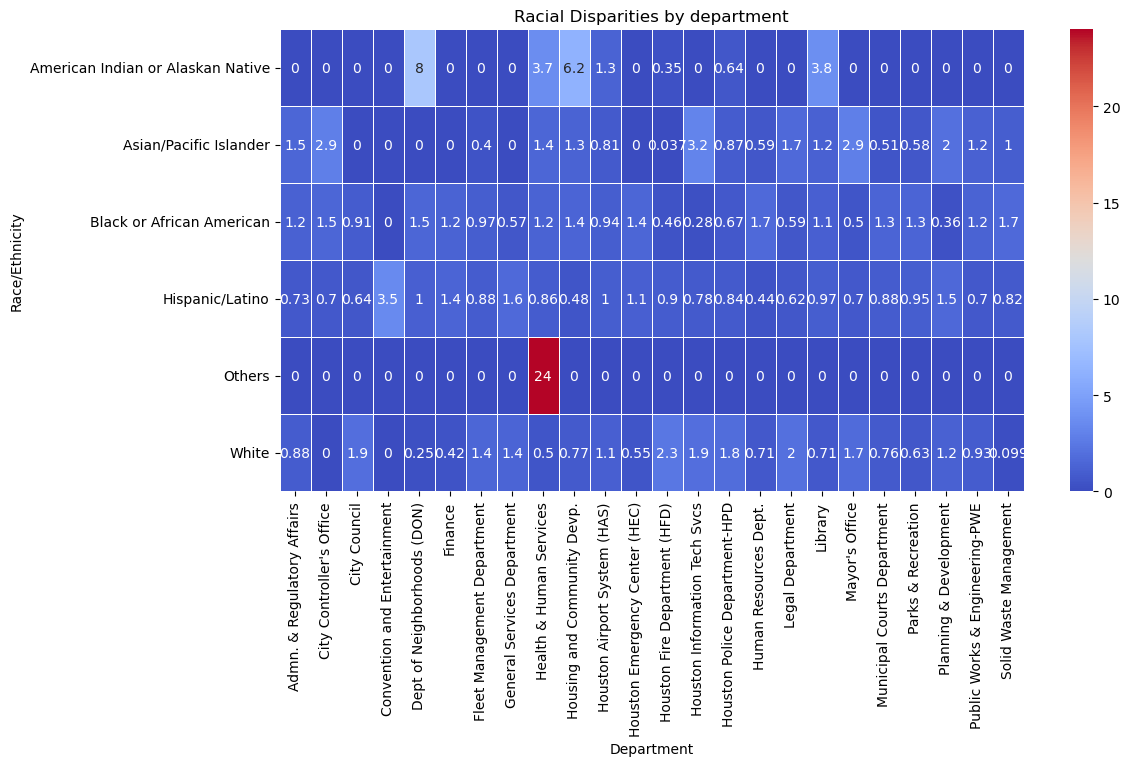

In [206]:
#visulizing  racial disparities by department
plt.figure(figsize = (12,6))
sns.heatmap(disparities_by_dept.T,annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Racial Disparities by department')
plt.xlabel('Department')
plt.ylabel('Race/Ethnicity')
plt.show()

In [207]:
#for POSITION TITLE
#to calculate the racial composition by position_title
racial_composition_by_position = employee.groupby(['POSITION_TITLE', 'RACE']).size().unstack(fill_value = 0)
racial_composition_by_position = racial_composition_by_position.div(racial_composition_by_position.sum(axis = 1), axis = 0)
racial_composition_by_position

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
POSITION_TITLE,,,,,,
3-1-1 TELECOMMUNICATOR,0.0,0.0,0.000000,1.000000,0.0,0.000
3-1-1 TELECOMMUNICATOR SUPERVISOR,0.0,1.0,0.000000,0.000000,0.0,0.000
9-1-1 PSAP SUPERVISOR,0.0,0.0,0.500000,0.500000,0.0,0.000
9-1-1 PSAP SUPERVISOR-FIRE/EMS,0.0,0.0,1.000000,0.000000,0.0,0.000
9-1-1 TELECOMMUNICATOR,0.0,0.0,0.750000,0.250000,0.0,0.000
...,...,...,...,...,...,...
UTILITY WORKER,0.0,0.1,0.700000,0.175000,0.0,0.025
WATER SERVICE INSPECTOR I,0.0,0.0,0.666667,0.333333,0.0,0.000
WATER SERVICE INSPECTOR II,0.0,0.0,1.000000,0.000000,0.0,0.000


In [208]:
#to calculate racial disparities by position_title
disparities_by_position = racial_composition_by_position.div(racial_composition_by_position.mean())
disparities_by_position

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
POSITION_TITLE,,,,,,
3-1-1 TELECOMMUNICATOR,0.0,0.000000,0.000000,4.172297,0.0,0.000000
3-1-1 TELECOMMUNICATOR SUPERVISOR,0.0,11.633434,0.000000,0.000000,0.0,0.000000
9-1-1 PSAP SUPERVISOR,0.0,0.000000,1.256189,2.086149,0.0,0.000000
9-1-1 PSAP SUPERVISOR-FIRE/EMS,0.0,0.000000,2.512377,0.000000,0.0,0.000000
9-1-1 TELECOMMUNICATOR,0.0,0.000000,1.884283,1.043074,0.0,0.000000
...,...,...,...,...,...,...
UTILITY WORKER,0.0,1.163343,1.758664,0.730152,0.0,0.096513
WATER SERVICE INSPECTOR I,0.0,0.000000,1.674918,1.390766,0.0,0.000000
WATER SERVICE INSPECTOR II,0.0,0.000000,2.512377,0.000000,0.0,0.000000


# Question 2
__a. What is the gender distribution within the organization?__

In [210]:
#to count the occurence of each gender
gender_counts = employee['GENDER'].value_counts()
#to calculate the gender distribution 
total_records = len(employee)
gender_distribution = gender_counts / total_records * 100 #this calculates the percentage
gender_distribution

Male      69.85
Female    30.15
Name: GENDER, dtype: float64

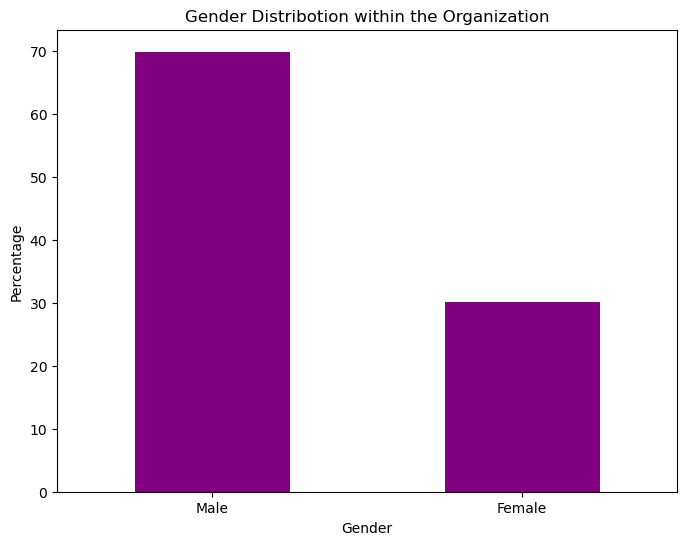

In [242]:
#visualizing gender distribution within the organization
plt.figure(figsize = (8,6))
gender_distribution.plot(kind = 'bar', color = 'purple')
plt.title('Gender Distribution within the Organization')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation = 0)
plt.show()

__b. Are there any gender imbalances in certain departments or roles?__

In [212]:
department_gender_distribution = employee.groupby('DEPARTMENT')['GENDER'].value_counts(normalize = True)*100

In [213]:
department_gender_distribution

DEPARTMENT                      GENDER
Admn. & Regulatory Affairs      Female     75.862069
                                Male       24.137931
City Controller's Office        Female     80.000000
                                Male       20.000000
City Council                    Female     63.636364
                                Male       36.363636
Convention and Entertainment    Female    100.000000
Dept of Neighborhoods (DON)     Male       52.941176
                                Female     47.058824
Finance                         Male       60.000000
                                Female     40.000000
Fleet Management Department     Male       91.666667
                                Female      8.333333
General Services Department     Male       90.909091
                                Female      9.090909
Health & Human Services         Female     75.454545
                                Male       24.545455
Housing and Community Devp.     Female     72.727273
       

<Figure size 1500x1000 with 0 Axes>

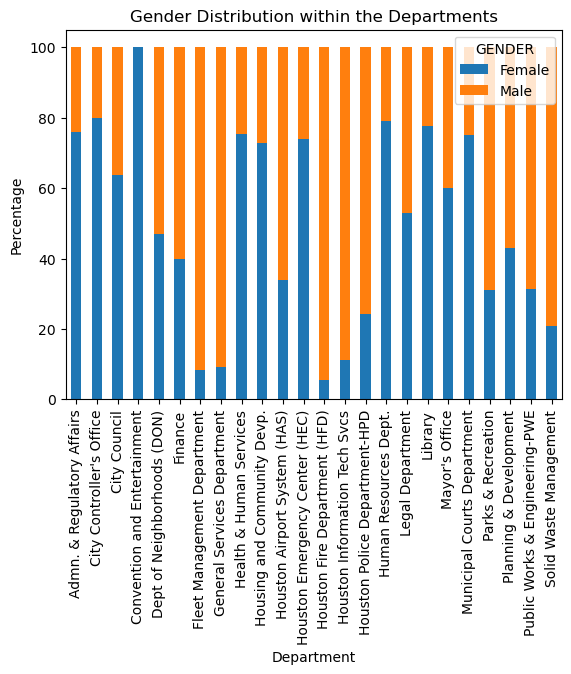

In [214]:
#visualize gender distribution across department
plt.figure(figsize = (15,10))
department_gender_distribution.unstack().plot(kind = 'bar', stacked = True)
plt.title('Gender Distribution within the Departments')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.legend(title = 'GENDER')
plt.xticks(rotation = 90)
plt.show()

In [215]:
position_title_gender_distribution = employee.groupby('POSITION_TITLE')['GENDER'].value_counts(normalize = True)*100

In [216]:
position_title_gender_distribution 

POSITION_TITLE                     GENDER
3-1-1 TELECOMMUNICATOR             Female    100.0
3-1-1 TELECOMMUNICATOR SUPERVISOR  Female    100.0
9-1-1 PSAP SUPERVISOR              Female     50.0
                                   Male       50.0
9-1-1 PSAP SUPERVISOR-FIRE/EMS     Female    100.0
                                             ...  
WATER SERVICE INSPECTOR I          Male      100.0
WATER SERVICE INSPECTOR II         Female     50.0
                                   Male       50.0
WEB DESIGNER                       Male      100.0
WORD PROCESSOR                     Female    100.0
Name: GENDER, Length: 437, dtype: float64

# Question 3
__a. What proportion of employees are full-time, part-time, or contract workers?__

In [217]:
#count the occurence of each employment type
employment_type_counts = employee['EMPLOYMENT_TYPE'].value_counts()

In [218]:
#to calculate the proportion of employee that are full-time, part-time, or contract workers
total_employees = len(employee)
employee_type_proportions = employment_type_counts / total_employees
employee_type_proportions

Full Time            0.9770
Part Time            0.0100
Temporary            0.0045
HFD Deferred Term    0.0045
Part Time 30         0.0040
Name: EMPLOYMENT_TYPE, dtype: float64

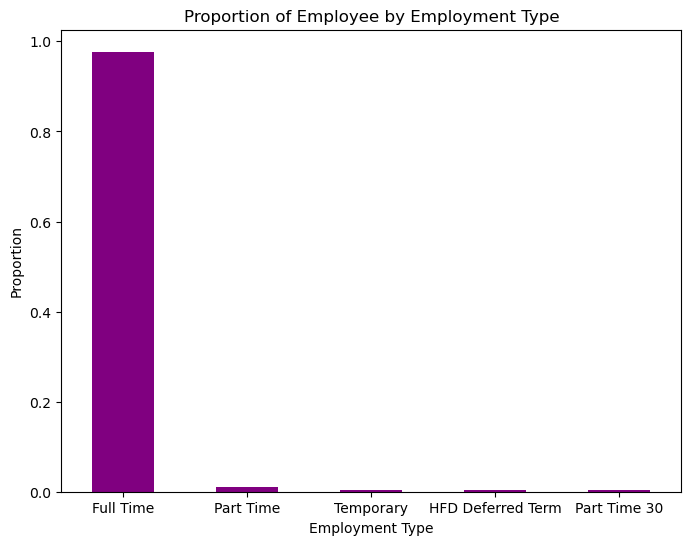

In [219]:
#visualization of the employee type proportion
plt.figure(figsize = (8,6))
employee_type_proportions.plot(kind = 'bar', color = 'purple')
plt.title('Proportion of Employee by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion')
plt.xticks(rotation = 0)
plt.show()

__b. Are there differences in employment types across departments?__

In [220]:
#group data by department and employment type and calculate proportions
department_employment_distribution = employee.groupby(['DEPARTMENT', 'EMPLOYMENT_TYPE']).size().unstack(fill_value = 0)
department_employment_proportions = department_employment_distribution.div(department_employment_distribution.sum(axis = 1),
                                                                       axis = 0)
department_employment_proportions

EMPLOYMENT_TYPE,Full Time,HFD Deferred Term,Part Time,Part Time 30,Temporary
DEPARTMENT,,,,,
Admn. & Regulatory Affairs,1.000000,0.000000,0.000000,0.000000,0.000000
City Controller's Office,1.000000,0.000000,0.000000,0.000000,0.000000
City Council,0.818182,0.000000,0.000000,0.181818,0.000000
Convention and Entertainment,1.000000,0.000000,0.000000,0.000000,0.000000
Dept of Neighborhoods (DON),1.000000,0.000000,0.000000,0.000000,0.000000
Finance,1.000000,0.000000,0.000000,0.000000,0.000000
Fleet Management Department,1.000000,0.000000,0.000000,0.000000,0.000000
General Services Department,1.000000,0.000000,0.000000,0.000000,0.000000
Health & Human Services,0.963636,0.000000,0.018182,0.018182,0.000000


<Figure size 1200x800 with 0 Axes>

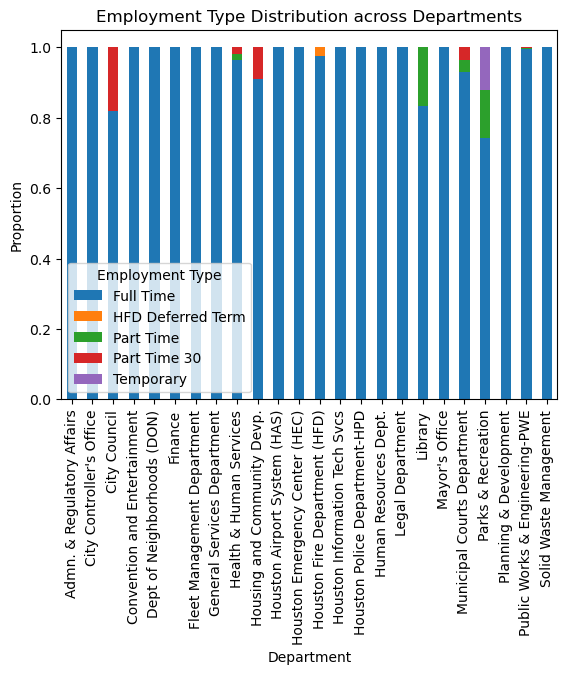

In [221]:
#visualization of the emplyment type distribution across departments
plt.figure(figsize = (12,8))
department_employment_proportions.plot(kind = 'bar', stacked = True)
plt.title('Employment Type Distribution across Departments')
plt.xlabel('Department')
plt.ylabel('Proportion')
plt.legend(title = 'Employment Type')
plt.xticks(rotation = 90)
plt.show()

# Question 6
__a. What is the distribution of base salaries across the organization?
(mean, mode, median)__

In [222]:
employee['BASE_SALARY'].mean()

55767.9298

In [223]:
employee['BASE_SALARY'].median()

55461.0

In [224]:
employee['BASE_SALARY'].mode()

0    66614.0
Name: BASE_SALARY, dtype: float64

# QUESTION 7
__a. Are there significant differences in salaries between different
demographic groups (e.g., race, gender)?__

In [225]:
#counting the total number of each gender
employee['GENDER'].value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [226]:
#group data by base salary and race and calculate proportions
race_by_base_salary= employee.groupby(['BASE_SALARY', 'RACE']).size().unstack(fill_value = 0)
race_by_base_salary = race_by_base_salary.div(race_by_base_salary.sum(axis = 1), axis = 0)
race_by_base_salary

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
BASE_SALARY,,,,,,
24960.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
26104.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
26125.0,0.051282,0.025641,0.589744,0.307692,0.0,0.025641
26229.0,0.000000,0.000000,0.500000,0.500000,0.0,0.000000
26250.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...
180416.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
186192.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
199596.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000


__b. Is there evidence of gender or racial pay gaps within the
organization?__

In [227]:
#calculating sumarry statistic by gender
summary_stats = employee.groupby('GENDER')['BASE_SALARY'].describe()

In [228]:
summary_stats

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
Female,603.0,52323.54461,21836.514044,24960.0,35328.5,47650.0,63165.5,178331.0
Male,1397.0,57254.66156,20554.934548,26104.0,43742.0,55767.9,66614.0,275000.0


In [229]:
#calculating sumarry statistic by race
summary_stats2 = employee.groupby('RACE')['BASE_SALARY'].describe()

In [230]:
summary_stats2

,count,mean,std,min,25%,50%,75%,max
RACE,,,,,,,,
American Indian or Alaskan Native,11.0,59862.627273,21884.861835,26125.0,52420.00,58855.0,73327.00,98536.0
Asian/Pacific Islander,110.0,60961.097273,24932.422394,26125.0,45125.25,55461.0,69998.75,163228.0
Black or African American,710.0,50181.627887,20944.565474,24960.0,35318.00,47143.5,60347.00,275000.0
Hispanic/Latino,484.0,52398.876240,17739.524110,26104.0,40170.00,50907.5,61921.00,165216.0
Others,2.0,51278.000000,17687.569025,38771.0,45024.50,51278.0,57531.50,63785.0
White,683.0,63073.326647,20404.436551,26125.0,53092.00,61643.0,66614.00,210588.0


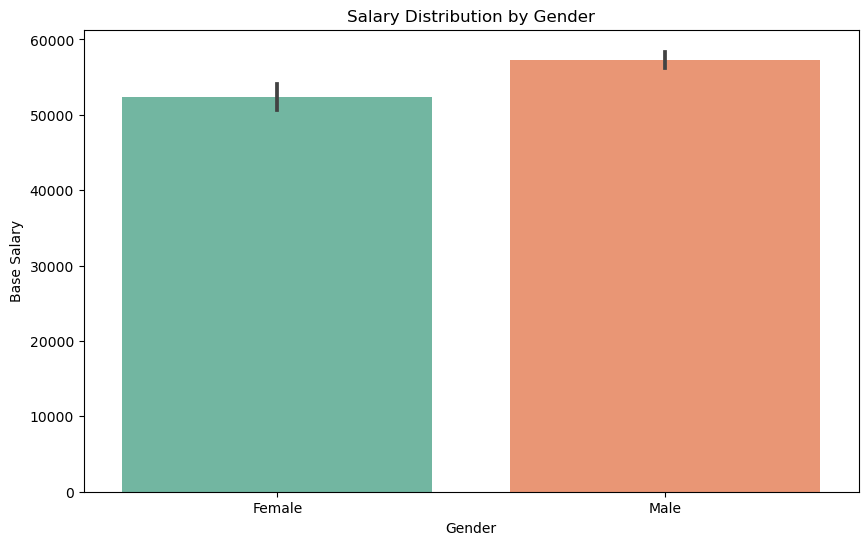

In [231]:
#ploting salary distribution by gender
plt.figure(figsize = (10, 6))
sns.barplot(x ='GENDER', y ='BASE_SALARY', data = employee, palette = 'Set2')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Base Salary')
plt.show()

# Question 8
__a. What is the average salary within each department or position
title?__

In [232]:
#group data by department and calculate mean salary
department_avg_base_salary = round(employee.groupby('DEPARTMENT')['BASE_SALARY'].mean(), 2)

In [233]:
department_avg_base_salary

DEPARTMENT
Admn. & Regulatory Affairs         50890.55
City Controller's Office           55711.60
City Council                       58485.35
Convention and Entertainment       38397.00
Dept of Neighborhoods (DON)        47092.88
Finance                            79650.30
Fleet Management Department        43994.31
General Services Department        51295.82
Health & Human Services            51468.19
Housing and Community Devp.        60876.81
Houston Airport System (HAS)       53956.07
Houston Emergency Center (HEC)     46415.74
Houston Fire Department (HFD)      59391.75
Houston Information Tech Svcs      76112.78
Houston Police Department-HPD      59824.08
Human Resources Dept.              56311.83
Legal Department                  104959.53
Library                            45959.23
Mayor's Office                     86489.60
Municipal Courts Department        53889.85
Parks & Recreation                 43334.46
Planning & Development             54879.57
Public Works & Engine

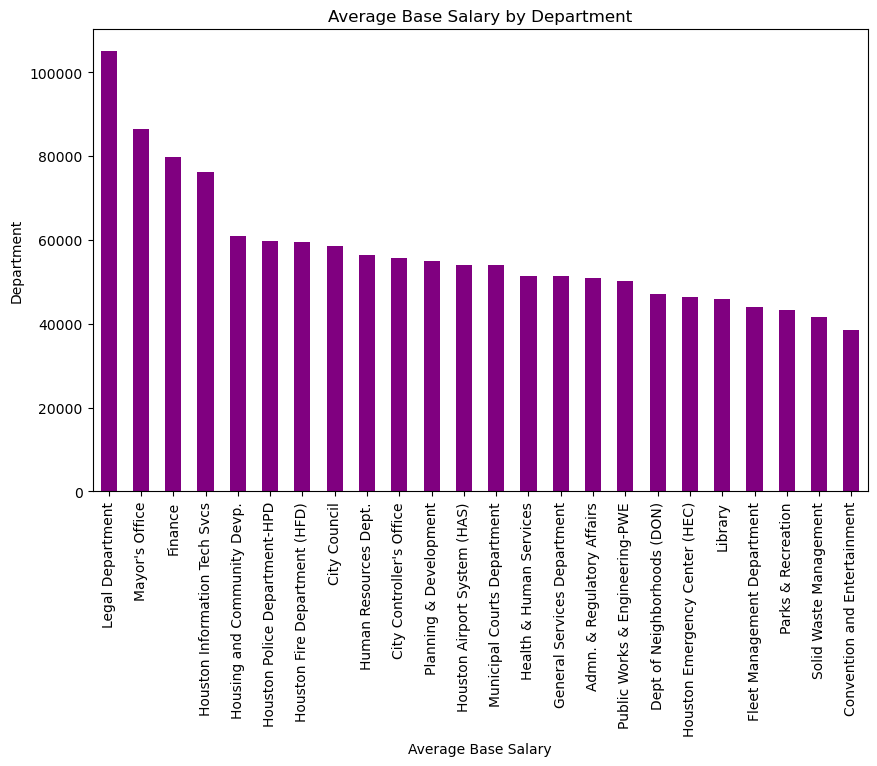

In [234]:
#ploting average base salary by department
plt.figure(figsize = (10, 6))
department_avg_base_salary_sort.plot(kind = 'bar', color = 'purple')
plt.xlabel('Average Base Salary')
plt.ylabel('Department')
plt.title('Average Base Salary by Department')
plt.show()

In [235]:
#group data by position title and calculate mean salary
position_title_avg_base_salary = round(employee.groupby('POSITION_TITLE')['BASE_SALARY'].mean(), 2)

In [236]:
position_title_avg_base_salary

POSITION_TITLE
3-1-1 TELECOMMUNICATOR               35152.00
3-1-1 TELECOMMUNICATOR SUPERVISOR    48755.00
9-1-1 PSAP SUPERVISOR                66144.00
9-1-1 PSAP SUPERVISOR-FIRE/EMS       71032.00
9-1-1 TELECOMMUNICATOR               34335.62
                                       ...   
UTILITY WORKER                       33235.32
WATER SERVICE INSPECTOR I            33113.67
WATER SERVICE INSPECTOR II           39416.00
WEB DESIGNER                         58753.33
WORD PROCESSOR                       31845.00
Name: BASE_SALARY, Length: 330, dtype: float64

__b. Are there departments or roles that offer higher salaries
compared to others?__

In [237]:
#sort departments by average salary 
department_avg_base_salary_sort = department_avg_base_salary.sort_values(ascending = False)

In [238]:
department_avg_base_salary_sort

DEPARTMENT
Legal Department                  104959.53
Mayor's Office                     86489.60
Finance                            79650.30
Houston Information Tech Svcs      76112.78
Housing and Community Devp.        60876.81
Houston Police Department-HPD      59824.08
Houston Fire Department (HFD)      59391.75
City Council                       58485.35
Human Resources Dept.              56311.83
City Controller's Office           55711.60
Planning & Development             54879.57
Houston Airport System (HAS)       53956.07
Municipal Courts Department        53889.85
Health & Human Services            51468.19
General Services Department        51295.82
Admn. & Regulatory Affairs         50890.55
Public Works & Engineering-PWE     50240.23
Dept of Neighborhoods (DON)        47092.88
Houston Emergency Center (HEC)     46415.74
Library                            45959.23
Fleet Management Department        43994.31
Parks & Recreation                 43334.46
Solid Waste Managemen

In [239]:
employee_sorted = employee.sort_values(by = 'BASE_SALARY', ascending = False)

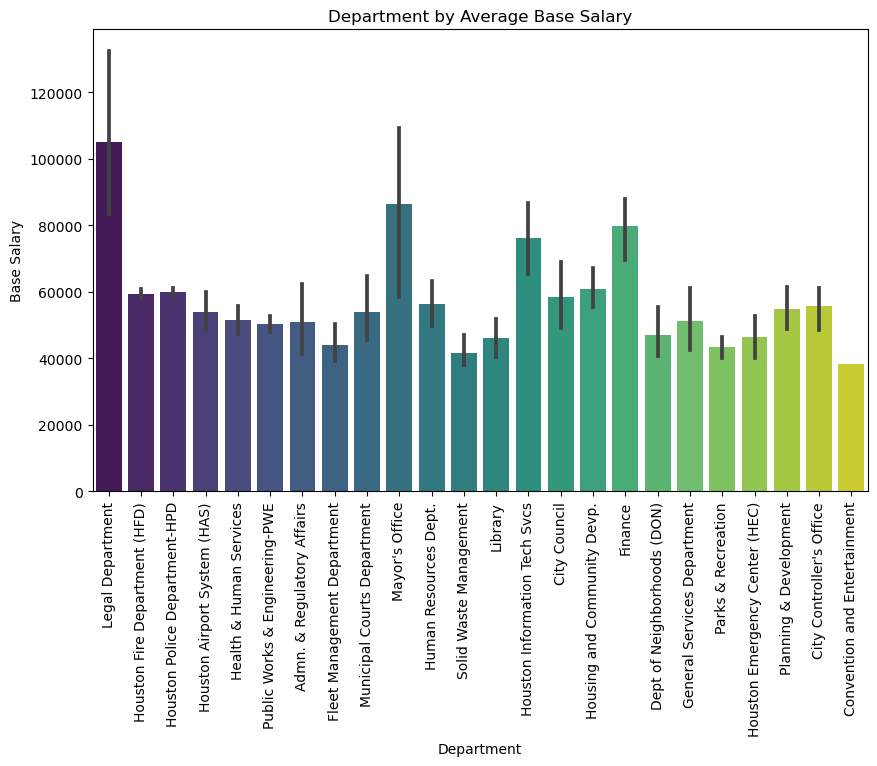

In [240]:
#ploting salary distribution by department
plt.figure(figsize = (10, 6))
sns.barplot(x ='DEPARTMENT', y ='BASE_SALARY', data = employee_sorted, palette = 'viridis')
plt.title('Department by Average Base Salary')
plt.xlabel('Department')
plt.ylabel('Base Salary')
plt.xticks(rotation = 90)
plt.show()

In [241]:
#sort departments by average salary 
position_title_avg_base_salary_sort = position_title_avg_base_salary.sort_values(ascending = False)
position_title_avg_base_salary_sort

POSITION_TITLE
CITY ATTORNEY                               275000.00
ASSOCIATE EMS PHYSICIAN DIRECTOR,MD         210588.00
DEPUTY DIRECTOR-FINANCE & ADMINISTRATION    199596.00
DEPUTY DIRECTOR-AVIATION (EX LVL)           186192.00
CHIEF PHYSICIAN,MD                          180416.00
                                              ...    
LABORER                                      26273.70
CUSTODIAN                                    26168.45
LIBRARY ASSISTANT                            26125.00
SENIOR CLERK                                 26125.00
CAR ATTENDANT                                24960.00
Name: BASE_SALARY, Length: 330, dtype: float64